#  In this notebook, closing price is explored and predicted

some of the code are simiar to this useful resource blow:

PythonDataScienceHandbook
https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.11-Working-with-Time-Series.ipynb 

In time-series data, there are some Important things to consider before
fitting machine-learning models.

1. A trend in the data
2. seasonality
3. outliers
4. long-run cycle
5. constant variance
6. abrupt changes


resource:  STAT 510  https://onlinecourses.science.psu.edu/stat510/node/47 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
%matplotlib inline

# Input data files are available in the "../input/" directory.
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


bitcoin_price_1week_Test - Test.csv
bitcoin_price_Training - Training.csv



In [2]:
train = pd.read_csv("../input/bitcoin_price_Training - Training.csv")
test = pd.read_csv("../input/bitcoin_price_1week_Test - Test.csv")

In [3]:
print(train.shape)
print(test.shape)

(1556, 7)
(7, 7)


In [4]:
train.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [5]:
train.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [6]:
test

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Aug 07, 2017",3212.78,3397.68,3180.89,3378.94,"1,482,280,000","52,987,300,000"
1,"Aug 06, 2017",3257.61,3293.29,3155.60,3213.94,"1,105,030,000","53,720,900,000"
2,"Aug 05, 2017",2897.63,3290.01,2874.83,3252.91,"1,945,700,000","47,778,200,000"
3,"Aug 04, 2017",2806.93,2899.33,2743.72,2895.89,"1,002,120,000","46,276,200,000"
4,"Aug 03, 2017",2709.56,2813.31,2685.14,2804.73,"804,797,000","44,666,400,000"
5,"Aug 02, 2017",2727.13,2762.53,2668.59,2710.67,"1,094,950,000","44,950,800,000"
6,"Aug 01, 2017",2871.30,2921.35,2685.61,2718.26,"1,324,670,000","47,321,800,000"


  #  Reverse the order of the date so that it becomes chronological order

In [7]:
train = train[::-1] 
test = test[::-1]
train.head()

,Date,Open,High,Low,Close,Volume,Market Cap
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"


# Change the date notation(string date) to numerical date
![](http://)-- define a function (which converts date to desired format) and apply each date
 
 Example -- 
 
f(x):= apply num

f(April 28, 2013) = 2013-04-28

In [8]:
from dateutil.parser import parse
from datetime import datetime

def convert(date):
    holder = []
    for i in date:
        tp = parse(i).timestamp()
        dt = datetime.fromtimestamp(tp)
        holder.append(dt)
    return np.array(holder)

In [9]:
date = train['Date'].values
date_n = convert(date)

In [10]:
# sanity check
print(len(date_n) == train.shape[0])

True


In [11]:
train['Date'] = date_n
train.head()

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


# Set Index as Date

In [12]:
train = train.set_index('Date')
train.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [13]:
train.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [14]:
# check the missing values
train.isnull().any()

Open          False
High          False
Low           False
Close         False
Volume        False
Market Cap    False
dtype: bool

 # Visualization of closing price (on row data & log-scale)

Idea: The reason why log-scale is used on y-axis is that it reveals the percentile change
     
     Ex: 

     Case 1) when price goes up from $ 10-$ 15: change(increase) is $5. Increase rate is 50%

     Case 2) when price goes up from $20-$25: change(increase) is  $5. Increase rate is 25%
       
In both cases , change is same but rate of change is different.



Refrence: What is the difference between a logarithmic price scale and a linear one?
http://www.investopedia.com/ask/answers/05/logvslinear.asp#ixzz4pKMuY5HA 

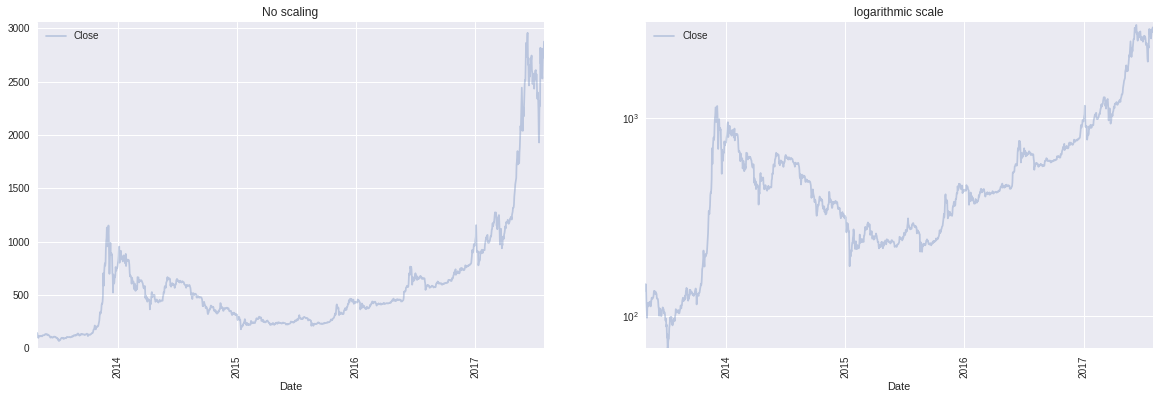

In [15]:
plt.figure(num=None, figsize=(20, 6))
plt.subplot(1,2,1)
ax = train['Close'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_ylim(0, np.max(train['Close'] + 100))
plt.xticks(rotation=90)
plt.title("No scaling")
ax.legend()
plt.subplot(1,2,2)
ax = train['Close'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_yscale('log')
ax.set_ylim(0, np.max(train['Close'] + 100))
plt.xticks(rotation=90)
plt.title("logarithmic scale")
ax.legend()

Some features of the plot above:

1. There is an uppward trend from 2016 for each graph
2.  There is no seasnality
3. There are no outliers
4. There are some vaiance in the logarithmic scaled data. This will be confirmed using rolling average and standard deviation.

 # Resampling at  lower frequency
 
 plot the average of price in the previous year and price at the end of the year

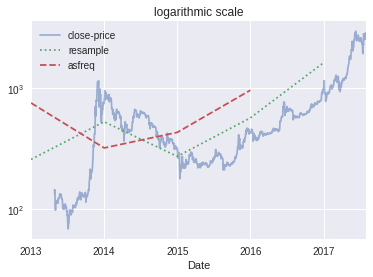

In [16]:
close = train['Close']
close.plot(alpha=0.5, style='-')
close.resample('BA').mean().plot(style=':')
close.asfreq('BA').plot(style='--')
plt.yscale('log')
plt.title("logarithmic scale")
plt.legend(['close-price', 'resample', 'asfreq'], 
           loc='upper left')
# 'resample'-- average of the previous year
# 'asfreq' -- value at the end of the year

 # ROI

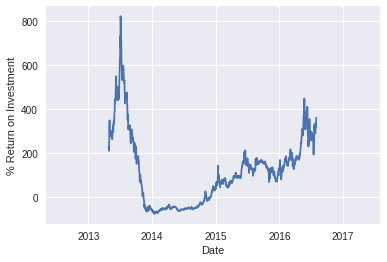

In [17]:
ROI = 100 * (close.tshift(-365) / close - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

# Moving averages: SMA and EMA
 
moving averages are used to smooth out the data to see the underlying trend

SMA(simple mean average) calculates the mean of some span(N) while EMA (exponential mean average) does so putting
more emphasis on recent points

reference: http://www.investopedia.com/university/movingaverage/movingaverages1.asp

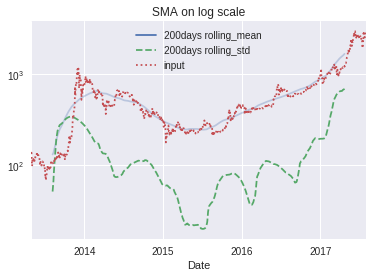

In [18]:
rolling = close.rolling(200, center=True)

data = pd.DataFrame({'input': close, 
                     '200days rolling_mean': rolling.mean(), 
                     '200days rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.set_yscale('log')
ax.set_title("SMA on log scale")
rolling = close.rolling(365, center=True)
ax.lines[0].set_alpha(0.3)

Important to note: standard deviation for (percentile)change of price  is not consitent over time or non-constant variance

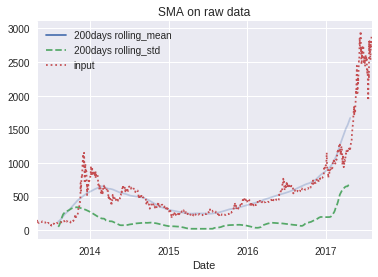

In [19]:
ax = data.plot(style=['-', '--', ':'])
ax.set_title("SMA on raw data")
ax.lines[0].set_alpha(0.3)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=200,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


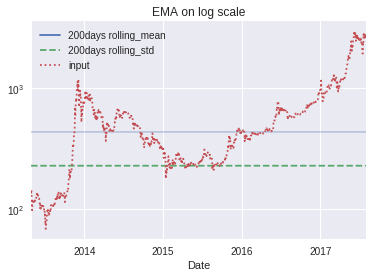

In [20]:
rolling = pd.ewma(close, com=200)

data = pd.DataFrame({'input': close, 
                     '200days rolling_mean': rolling.mean(), 
                     '200days rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.set_yscale('log')
ax.set_title("EMA on log scale")
ax.lines[0].set_alpha(0.3)

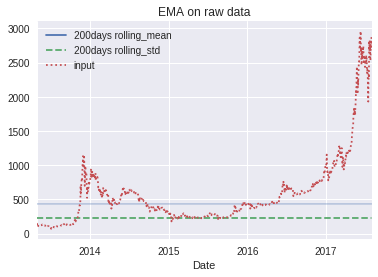

In [21]:
ax = data.plot(style=['-', '--', ':'])
ax.set_title("EMA on raw data")
ax.lines[0].set_alpha(0.3)

# Lag Plot ( check whether time series is random or not)

resource: http://www.itl.nist.gov/div898/handbook/eda/section3/lagplot.htm 

In the graph below, firt axis represents the  t(lag), seond axis represents t+1

Ex: if data is, [1,4,5,3,2], then y(t):= [1,4,5,3,2], y(t+1): = [4,5,3,2]

As we see the graph below, this suggests the non-random pattern (graph is poistively linear).

Non-randomness in the data reveals that we could use an autoregressive model

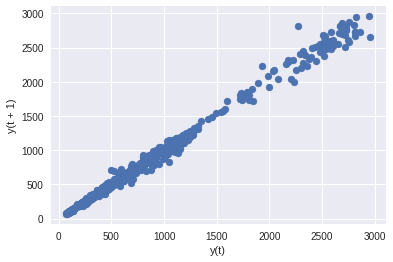

In [22]:
from pandas.plotting import lag_plot
lag_plot(close)

  # Autocorrelation
resource: http://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm 

A lag plot above shows the structure in the data. In order to quantify the correlation between the point at t and point at t+1
withe respect to expectation, autocrrelation is used.

A  black line in the graph below shows the expectation for random data(thus 0 correlation) and two dash lines above and below it represent the confidence interval with each 95% and 99%.

The graph shows a strong correlation for lags of < 100 days. (lag 0 is always 1 corrleation)

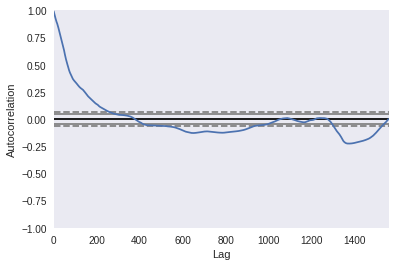

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(close)

# Partial autocorrelation

Idea: Partical autocorrelation only descirbes the direct effect of a value at t-k(k is a lag) on value at t, ignoring the values between them (values from t-k+1 to t-1). Autocrrelaiton take the in-between values into account. 
Partial autocrrelation will us detemine the order of an autoregressive model, p. (AR(p))
reference: Difference between autocrrelation and partial autocorrelation
https://stats.stackexchange.com/questions/129052/acf-and-pacf-formula


In [24]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_pacf

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


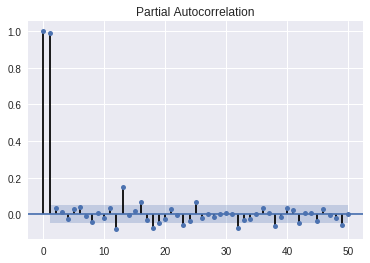

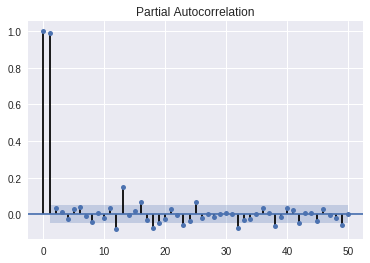

In [25]:
plot_pacf(close, lags=50)

# Autoregression
lag plot and autocorrelation revealed that we could use autoregression for fitting data
we will predict test data (closing price for 7 days) using training data

resource: 
Autoregression Models for Time Series Forecasting With Python
http://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

In [26]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

test = test['Close'].values

In [27]:
train_pr = train['Close'].values

In [28]:
# train and fit autoregression
model = AR(train_pr)
model_fit = model.fit()

print("Lag: %s" % model_fit.k_ar)
print("Coefficients: %s" % model_fit.params)

pred = model_fit.predict(start=len(train), end=len(train_pr)+len(test)-1, dynamic=False)
mse = mean_squared_error(test, pred)
print("Test MSE {0:.3f}".format(mse))

Lag: 24
Coefficients: [ -5.93224038e-01   9.68541384e-01  -4.46816657e-03   1.08726752e-02
   5.62501188e-02  -1.96305055e-02  -2.04566246e-02  -3.68850269e-02
   2.25865872e-02   9.09395297e-05   4.63140594e-02   6.96864349e-02
  -6.15615194e-02  -4.82916394e-02   9.21960256e-02  -9.52353216e-03
   2.55395829e-03  -1.29667192e-02  -3.87685150e-02  -4.24641381e-02
   1.07858677e-02  -1.28956465e-01   1.98373368e-01  -1.08179141e-01
   5.81163082e-02]
Test MSE 36821.060


Important to note:

1. 24 lags are used to train the model (24 previous points are used to predict a next point)

2. MSE is high

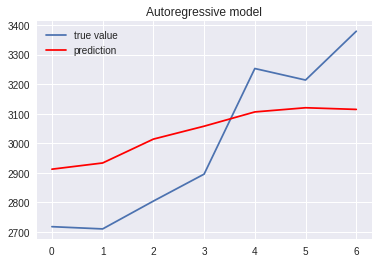

In [29]:
plt.plot(test, label='true value')
plt.plot(pred, color='red', label='prediction')
plt.title("Autoregressive model")
plt.legend()